In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"D:\Ohana - Data Analysis Bootcamp\Classwork\WAUS-VIRT-DATA-PT-03-2023-U-LOLC\02-Homework\05-Data-Visualisation\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"D:\Ohana - Data Analysis Bootcamp\Classwork\WAUS-VIRT-DATA-PT-03-2023-U-LOLC\02-Homework\05-Data-Visualisation\Pymaceuticals\data\Study_results.csv"

# Read the study results data and the mouse metadata
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)

# Combine the data into a single dataset using a left merge with study_results first
mouse_study_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice.
mouse_study_data["Mouse ID"].nunique()

249

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_data[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(f"Duplicate mice: {duplicate_mice}")

Duplicate mice: ['g989']


In [61]:
#Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'
duplicate_data = mouse_study_data[mouse_study_data['Mouse ID'] == duplicate_mouse_id]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_study_data = mouse_study_data[mouse_study_data['Mouse ID'] != duplicate_mouse_id]
clean_study_data.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:
# Checking the number of mice in the clean DataFrame
num_mice = clean_study_data['Mouse ID'].nunique()
print(f"Number of mice in the clean DataFrame: {num_mice}")


Number of mice in the clean DataFrame: 248


In [64]:
# Summary Statistics

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_summary = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Rename the columns in the summary statistics table
tumor_volume_summary = tumor_volume_summary.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
drug_regimen_stats = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regimen_stats.columns = pd.MultiIndex.from_tuples([('Tumor Volume (mm3)', col) for col in drug_regimen_stats.columns])
drug_regimen_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<Axes: title={'center': 'Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

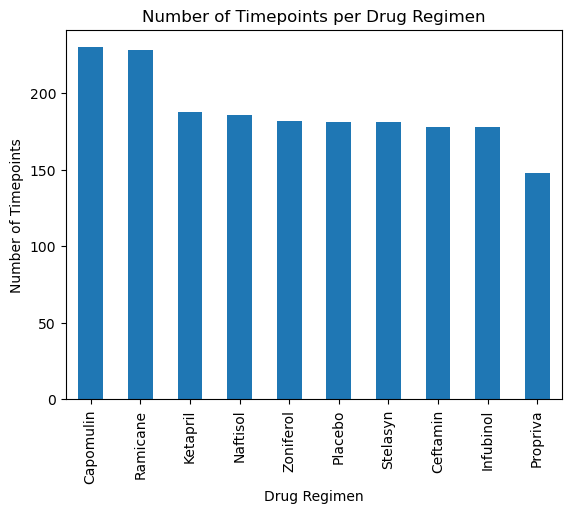

In [66]:
#Bar and Pie Charts 

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_timepoints = clean_study_data.groupby('Drug Regimen')['Timepoint'].count()
drug_regimen_timepoints = drug_regimen_timepoints.sort_values(ascending=False)  
#Sort in descending order
drug_regimen_timepoints.plot(kind='bar', title='Number of Timepoints per Drug Regimen', ylabel='Number of Timepoints')


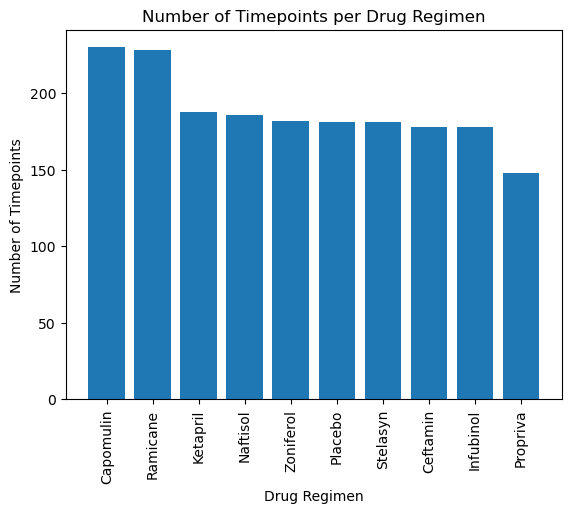

In [67]:

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen_timepoints = clean_study_data.groupby('Drug Regimen')['Timepoint'].count()
drug_regimen_timepoints_sorted = drug_regimen_timepoints.sort_values(ascending=False)
plt.bar(drug_regimen_timepoints_sorted.index, drug_regimen_timepoints_sorted.values)
plt.title('Number of Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)
plt.show()



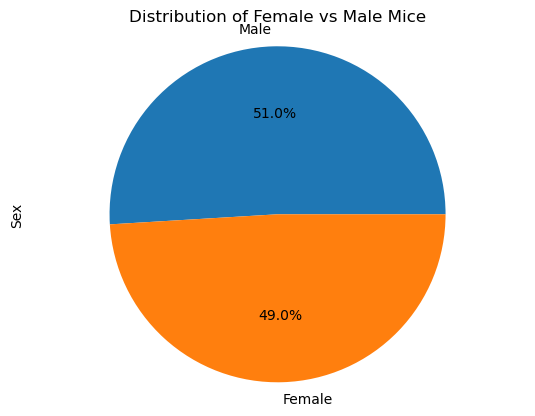

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create a dataframe with the counts of each gender
gender_counts = clean_study_data['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()


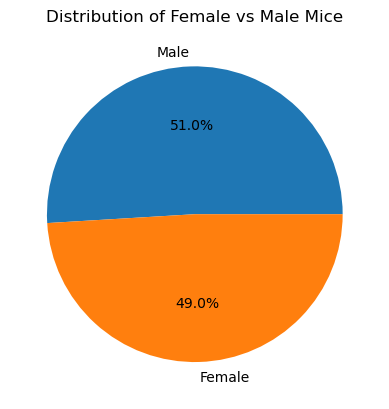

In [69]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the number of male and female mice
gender_counts = clean_study_data['Sex'].value_counts()

# Create the pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()


In [80]:
#Calculate Quartiles, Find Outliers, and Create a Box Plot
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, clean_study_data , on=['Mouse ID', 'Timepoint'], how='left')


In [81]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
for drug in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    tumor_volumes.append(final_tumor_volume)
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = final_tumor.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen'] == drug) & ((final_tumor_volume['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_volume['Tumor Volume (mm3)'] > upper_bound)), 'Tumor Volume (mm3)'] 
    
    # Print results
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


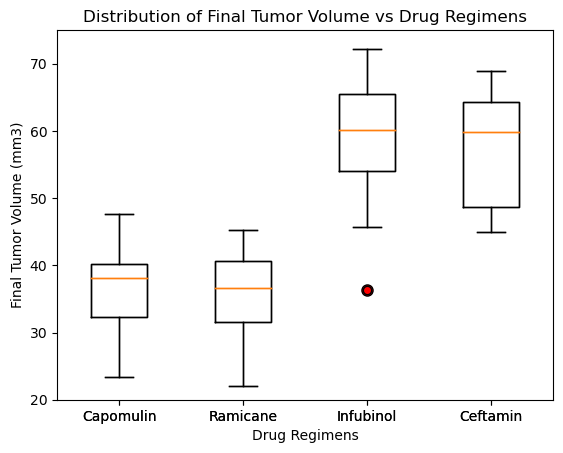

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement

# Group data by Drug Regimen and Mouse ID to capture last tumor measurement
treatment_groups = clean_study_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

# Create a DataFrame from the grouped data
final_df = pd.DataFrame(treatment_groups)

# Create a list of the four treatment regimens to use as labels
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of tumor volume values for each regimen
tumor_vols = [final_df.loc[regimen]['Tumor Volume (mm3)'] for regimen in treatment_regimens]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=treatment_regimens, flierprops=dict(markersize=8, markerfacecolor='red'))
plt.boxplot(tumor_vols, labels=treatment_regimens)
plt.ylim(20, 75)
plt.xlabel('Drug Regimens')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume vs Drug Regimens')
plt.show()


Text(0, 0.5, 'Tumor Volume (mm3)')

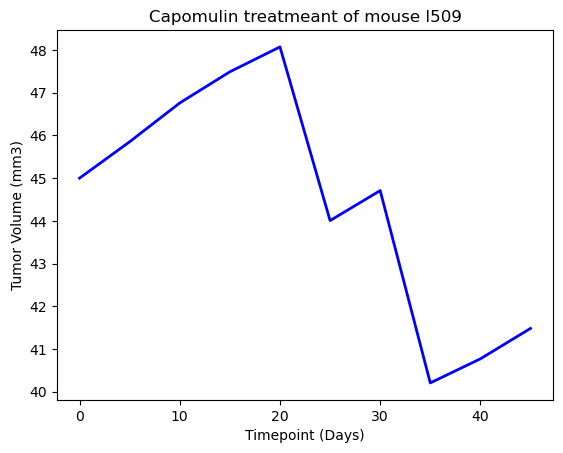

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_vs_timepoint = clean_study_data.loc[clean_study_data["Mouse ID"] == "l509",:]

x_axis = tumor_vs_timepoint["Timepoint"]
tumsiz = tumor_vs_timepoint["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

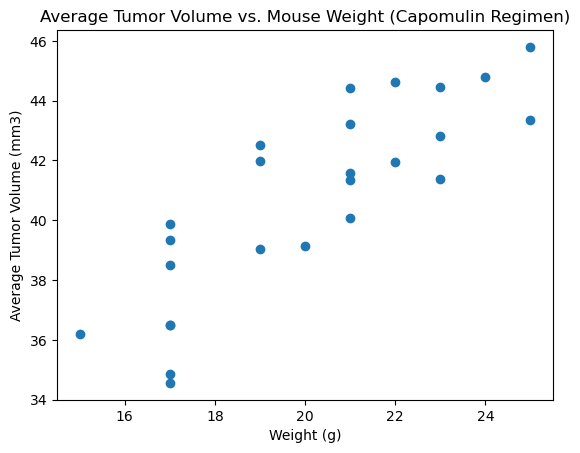

In [75]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter the Capomulin regimen data
capomulin_data =clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and weight for each mouse
avg_data = capomulin_data.groupby("Mouse ID").mean(numeric_only=True)

# Generate the scatter plot
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])

# Set the plot title and axis labels
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


In [76]:
## Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_avg_data = capomulin_data.groupby('Mouse ID', as_index=False)[['Weight (g)', 'Tumor Volume (mm3)']].mean(numeric_only=True)
# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_avg_data['Weight (g)'],capomulin_avg_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")



The correlation between mouse weight and the average tumor volume is 0.84


y = 0.95x + 21.55


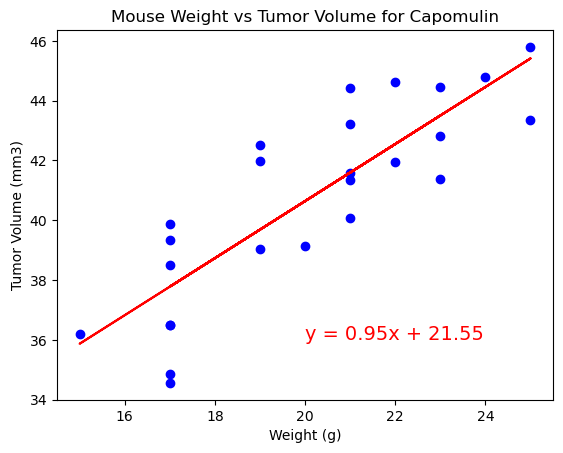

In [77]:

# Perform linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg_data["Weight (g)"], capomulin_avg_data["Tumor Volume (mm3)"])
print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and linear regression line
fig, ax = plt.subplots()
ax.scatter(capomulin_avg_data["Weight (g)"], capomulin_avg_data["Tumor Volume (mm3)"], color="blue")
ax.plot(capomulin_avg_data["Weight (g)"], slope*capomulin_avg_data["Weight (g)"]+intercept, color="red")
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Mouse Weight vs Tumor Volume for Capomulin")
ax.text(20, 36, f"y = {slope:.2f}x + {intercept:.2f}", fontsize=14, color="red")
plt.show()
